In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits import mplot3d
import sympy as sp
import math

Problem 1: Moon Plane
===

This part is to map the moons orbit to a circular line of best fit. This will be done by fitting the moon's coordinates to the equation `z = ax + by` using a least squares regression. Then I can visualize this data, and see how well a simple circular, 2 dimensional fitting represents the moons orbit.

Part a: Fitting the curve
---

This part is a least squares regression. The process will be simple. Append ones to my input data, fit it to a least square, and that should give me my a and b. 

In [2]:
# Data for moon positions
moondata = np.array([[-0.001320094483526054, 0.002213374631586846, 0.00016830915032688143],
[-0.0017616357434186952, 0.00182271406520042, 0.00019579106280049032],
[-0.0021078960934758323, 0.001332248935118996, 0.00021253356565620194],
[-0.002334755870949562, 0.0007653712054749055, 0.00021706986150434103],
[-0.0024236221222408297, 0.0001526558207235525, 0.000208600775082131],
[-0.002364173597489967, -0.00046960277163790213, 0.0001871921007318491],
[-0.002156589052727641, -0.0010622039541082352, 0.000153891547110742],
[-0.001812479098652751, -0.001586874340444519, 0.00011070719581398961],
[-0.0013540498731971261, -0.002010300082897984, 0.00006042877818145357],
[-0.0008116352799129656, -0.002307379235901042, 0.00000632936961824009],
[-0.0002202884886910116, -0.0024630260631795264, -0.000048175642757224255],
[0.000383699153381161, -0.002472427222641309, -0.00009983523603592085],
[0.0009657029547007644, -0.002340117885897088, -0.0001457890941646599],
[0.001494829100294498, -0.002078415346655493, -0.0001837050162096248],
[0.001945185317896994, -0.001705661954356895, -0.0002118431857331569],
[0.002296549466270628, -0.001244542216416021, -0.0002290705375848766],
[0.002534635487568744, -0.0007205738036252609, -0.0002348448064662489],
[0.002651099197463827, -0.0001607767863651207, -0.0002291804814987132],
[0.002643361820609961, 0.00040750570965747147, -0.00021260258703125203],
[0.002514286072544949, 0.0009576550204398836, -0.00018609076190181012],
[0.002271724396064567, 0.001464693041523677, -0.00015101536396249692],
[0.0019279646350622332, 0.001906054809443901, -0.00010906817578683381],
[0.0014991120615353499, 0.002262208219970337, -0.00006219138816840622],
[0.001004455524608803, 0.002517128785058479, -0.00001250881561514573],
[0.0004658611771007805, 0.002658661987223574, 0.00003773777295930228],
[-0.00009278282858428892, 0.002678828541697353, 0.00008624670669790422],
[-0.0006460811297640639, 0.002574140406468884, 0.0001307116324692835],
[-0.001167659322191212, 0.002345991123480043, 0.0001688803212536162],
[-0.001630806961906302, 0.0020011566133611982, 0.0001986267981255369],
[-0.002009379296517953, 0.001552383742422587, 0.0002180484842903895],
[-0.002279119740274275, 0.0010189458038119522, 0.00022559871832244962]])

row, col = moondata.shape

In [3]:
A = moondata[:,0:2]
b = moondata[:,2]

# Now I have my A and b, I can do a least squares regression. 
x, rsq, rank, svd = np.linalg.lstsq(A,b, rcond=None)
print("My a is", x[0], "and b is", x[1])

My a is -0.08469607164004458 and b is 0.02810334816708048


Part b
---
Now, I want to plot the points and a plane to see how well the fit is

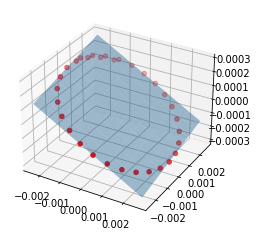

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax is now my Axis figure, lets scatter plot all the moon data
ax.scatter3D(moondata[:,0], moondata[:,1], moondata[:,2], color='r')

# i and j give me my linespace, just 10 even points between the max and min of the moon data
k = np.linspace(np.amin(moondata[:,0]), np.amax(moondata[:,0]), 10)
l = np.linspace(np.amin(moondata[:,1]), np.amax(moondata[:,1]), 10)

# Now, I get a mesh grid. This is a rectangle that I can plot my values over
X,Y = np.meshgrid(k,l)
Z = x[0]*X + x[1] * Y

# And plot
ax.plot_surface(X, Y, Z, alpha=.4)

plt.show()

This is a pretty good fit! Lets try to get a flat view so I can see how well the fit is

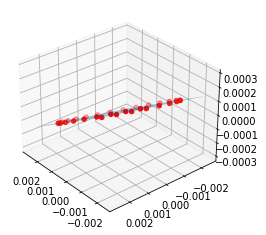

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(moondata[:,0], moondata[:,1], moondata[:,2], color='r')
ax.plot_surface(X, Y, Z, alpha=.4)
ax.azim = 140
plt.show()


As you can see, the fit seems to be pretty decent. The plane fits the coordinates very well. The orbit of the moon is decently flat.

Part c
---
I need to find the normal vector to the plane. The best way to find it is by getting 2 vectors in the plane, and taking their cross. I can use the two points as my vectors since the plane goes through the origin. I know these points are contained in my plane becaue they satisfy `z = ax + by`. To normalize this, I made a small little function to normalize any vector for me, since Python doesn't seem to have one.

In [6]:
v1 = np.array([1, 0, x[0]])
v2 = np.array([0, 1, x[1]])

# Cross them
n = np.cross(v1, v2)

def normalize(vector):
    return vector/np.linalg.norm(vector)

# Normalize it
un = normalize(n)
print("The normal vector is", un)

The normal vector is [ 0.08436085 -0.02799212  0.99604201]


Part d
---
I want to make a time series plot of distance over time. So the best way is to loop over the data, dot the data with the normal vector, and then plot the resulting data

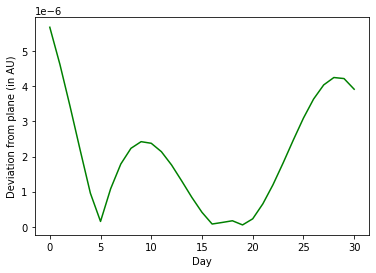

In [7]:
plt.figure()

diff = np.empty((row, ) )    # The differences in a list
# Go through, find the differnce. This is calculated by dotting the data for a day with the unit vector
for i, day in enumerate(moondata):
    diff[i] = np.absolute(np.dot(day, un))

plt.plot(range(0, row), diff, color='green')

# Setting our labels
plt.xlabel("Day")
plt.ylabel("Deviation from plane (in AU)")

plt.show()


Part e
---
I now want to redo the least squares, but changing my A to be the y and z values, and b to be my x values. Then, I can find the unit normal vector as well, and compare this to the other unit vector I found.

In [8]:
A2 = moondata[:,1:3]
b2 = moondata[:,0]

# Now I have my A and b, I can do a least squares regression. 
x2, rsq2, rank2, svd2 = np.linalg.lstsq(A,b, rcond=None)
print("My a is", x2[0], "and b is", x2[1])
print()

vec1 = np.array([x2[0], 1, 0])
vec2 = np.array([x2[1], 0, 1])

# Cross them
n2 = np.cross(vec1, vec2)

# Normalize it
un2 = normalize(n2)
print("The normal vector is", un2)
print()

# And the distance is the norm of the difference between them
distance = np.linalg.norm(un - un2)
print("The distance between the vectors is", distance)

My a is -0.08469607164004458 and b is 0.02810334816708048

The normal vector is [ 0.99604201  0.08436085 -0.02799212]

The distance between the vectors is 1.3756567996124058


This is close because they are almost the same vector. The x, y, and z values have just been switched around


Part f
---

The moon probably isn't on a perfect plane due to slight irregularities from other space bodies. For example, the sun and large planets like jupiter probably pull on the moon, destabling it's planar orbit

Problem 2
===

Now, I want to fit a conic least squares using the moons orbit. That way, we can account for the variation off of a plane. 

Part a
---

I want to orthogonalize the vectors. Thankfully, the scipy package has an orth function that will give me the 2 orthogonal vectors. Then, I just have to normalize them

In [9]:
# I take my 2 vectors (transpose), and find the orthogonal vectors associated. 
frame, R = np.linalg.qr(np.array([v1,v2]).T)
print("My orthonormal basis is")
print(frame)

My orthonormal basis is
[[-0.99643247 -0.00236236]
 [-0.         -0.99960814]
 [ 0.08439392 -0.02789225]]


Part b
---

Now, to apply my matrix onto the 2d surface. I just want to dot my matricies together

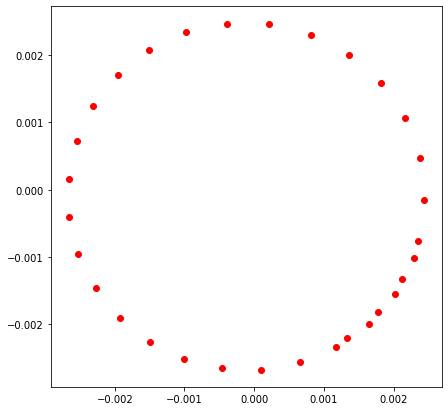

In [10]:
moondata2 = np.dot(moondata, frame)
# This is the exact same plot as before, just using the moondata2
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

# ax is now my Axis figure, lets scatter plot all the moon data
ax.scatter(moondata2[:,0], moondata2[:,1], color='r')

plt.show()

Part c
---

Now, I want to find the best fit for my data. We will use a least squares to solve

> x<sup>2</sup> = a\*x\*y + b\*y<sup>2</sup> + c\*x + d*y + 1

My A will be the coefficients on the right, and my b will be the left side 

In [11]:
A = np.array([moondata2[:,0] * moondata2[:,1], moondata2[:,1]**2, moondata2[:,0],  moondata2[:,1], np.ones((row, ) )]).T
b = np.array(-1 * (moondata2[:,0]**2))

x3, j, k, l = np.linalg.lstsq(A, b, rcond=None)
rx3 = np.round(x3, decimals=6)
print("My equation is 0 = x^2 +", rx3[0], "*xy +", rx3[1], "*y^2 +", rx3[2], "*x +", rx3[3], "*y +", rx3[4])


My equation is 0 = x^2 + 0.010383 *xy + 0.974464 *y^2 + 0.000235 *x + 0.000192 *y + -6e-06


In [12]:
# I will use sympy to solve this for y
y, x = sp.symbols('y, x')

# getting an equation equal to 0
eq1 = sp.Eq(x**2 + (x3[0]*x*y) + (x3[1]*y**2) + (x3[2]*x) + (x3[3]*y) + x3[4], 0)
ys = sp.solve(eq1, y)   # Solving for y
ys[0]

-0.00532778031513856*x - 1.01300407667345*sqrt(-x**2 - 0.000233603089711333*x + 6.50806922945688e-6) - 9.87721363687694e-5

Part d
---

And now we want to plot this conic section in cyan along with the scatter of the original data in red to analyize the fit

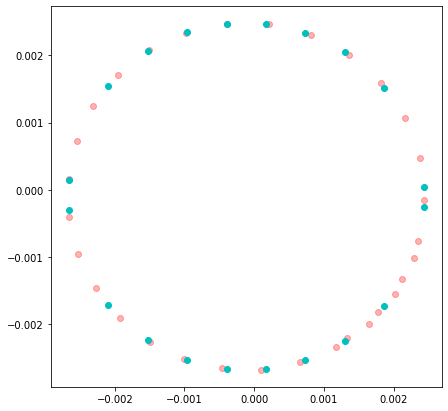

In [13]:
# This first part is just a copy of part b
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.scatter(moondata2[:,0], moondata2[:,1], color='r', alpha=.3)

# I want to go from min to max
X = np.linspace(np.amin(moondata2[:,0]), np.amax(moondata2[:,0]), 10)

# For each point, I want to solve it. So subs it in for my x to get a y
for i in X:
    ax.scatter(i, ys[0].subs({x:i}), c='c')
    ax.scatter(i, ys[1].subs({x:i}), c='c')

plt.show()

Problem 3: Stock prices
===

Now, I want to try and predict values of stocks using a least squared regression

Part a
---

I will use the stocks in the order of X = "Verastem", Y = "Xin Jiang Ready Health Industry Co Ltd", Z = "MorphoSys AG"

Part b
---

`Y` and `Z` will be one day behind, so they will go for the first 7 days. Then, I use those as my `A`. Then, I will use the last 7 days of `X` as my today values. Then, I can solve the least square

In [14]:
stocks = np.array([[2.34, 2.43, 2.36, 2.31, 2.26, 2.38, 2.37, 2.44], 
[0.240691, 0.242224, 0.243758, 0.234559, 0.246824, 0.252956, 0.24989, 0.260621],
[24.8325, 25.069, 25.542, 24.8325, 22.231, 22.9405, 22.231, 22.9405]])
row, col = stocks.shape

A = np.array([stocks[1, 0:col -1], stocks[2, 0:col -1]]).T
b = np.array(stocks[0, 1:col])

Part c
---

Now, I want to apply my least squared solution to the data to see how well the model fits the data

In [15]:

x1, rsq1, rank, svd = np.linalg.lstsq(A,b, rcond=None)
print("The least square solution is")
print(x1)

The least square solution is
[8.95793804e+00 7.28872597e-03]


**Part c 1**

The X values are a day ahead because we want to try and predict a day ahead. So by putting X one day ahead, we can try to predict X by looking at Y and Z

Part d
---

The residual error is luckily given to us by np.linalg.lstsq(). So I can use that from part b, and just divide by the length

In [16]:
print("My mean-squared error is", rsq1/(col - 1))

My mean-squared error is [0.00262046]


Part e
---

I now am going to repeat this using X = "Xin Jiang Ready Health Industry Co Ltd", Y = "Verastem", Z = "MorphoSys AG"

In [17]:
A = np.array([stocks[0, 0:col -1], stocks[2, 0:col -1]]).T
b = np.array(stocks[1, 1:col])

x, rsq, rank, svd = np.linalg.lstsq(A,b, rcond=None)
print("The least square solution is")
print(x)
print()
print("My mean-squared error is", rsq/(col - 1))
print("My balanced mean-squared error is", 100*rsq/(col - 1))

The least square solution is
[ 0.15722586 -0.00510857]

My mean-squared error is [6.15250468e-05]
My balanced mean-squared error is [0.0061525]


It is not fair to compare mean error because the stock prices vary by factors of 10. A quick way to scale it would be to multiply my second error by 2, which is what I did

Part f
---

Now, I want to do a quadratic fit

In [18]:
A = np.array([stocks[1, 0:col -1], stocks[2, 0:col -1], stocks[1, 0:col -1]**2, stocks[1, 0:col -1]*stocks[2, 0:col -1], stocks[2, 0:col -1]**2]).T
b = np.array(stocks[0, 1:col])

x2, rsq2, rank, svd = np.linalg.lstsq(A,b, rcond=None)

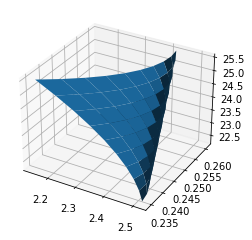

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# i and j give me my linespace, just 10 even points between the max and min of the moon data
k = np.linspace(np.amin(stocks[1]), np.amax(stocks[1]), 10)
l = np.linspace(np.amin(stocks[2]), np.amax(stocks[2]), 10)

# Now, I get a mesh grid. This is a rectangle that I can plot my values over
Y, Z = np.meshgrid(k,l)
X = x2[0]*Y + x2[1]*Z + x2[2]*(Y**2) + x2[3]*Y*Z + x2[4]*(Z**2)

# And plot
ax.plot_surface(X, Y, Z)

plt.show()


Part g
---

Now, I will use f = Sin(12x) and g = Log(x) as a model for my data. So my equation will be

> X\[n\] = Sin(12 * Y\[n-1\]) + Log(Z\[n-1\])


I can then set up a least squares to solve this

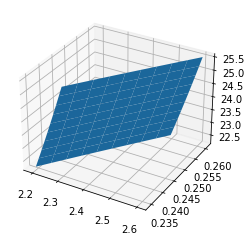

In [20]:
A = np.array([np.sin(12 * stocks[1, 0:col -1]), np.log(stocks[2, 0:col -1])]).T
b = np.array(stocks[0, 1:col])

x3, rsq3, rank, svd = np.linalg.lstsq(A,b, rcond=None)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Now, I get a mesh grid. This is a rectangle that I can plot my values over
Y, Z = np.meshgrid(k,l)
X = x3[0]*np.sin(12*Y) + x3[1]*np.log(Z)

# And plot
ax.plot_surface(X, Y, Z)

plt.show()

Part h
---

Now, I graph all together and plot against the data

In [21]:
print("My mean-squared error from c is", rsq1/(col - 1))
print("My mean-squared error from f is", rsq2/(col - 1))
print("My mean-squared error from g is", rsq3/(col - 1))

My mean-squared error from c is [0.00262046]
My mean-squared error from f is [0.00145037]
My mean-squared error from g is [0.00396454]


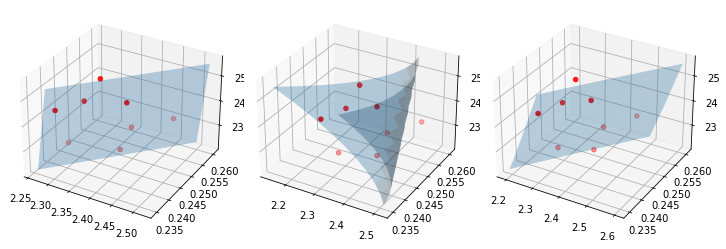

In [22]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

X = x1[0]*Y + x1[1]*Z
ax1.plot_surface(X, Y, Z, alpha=.3)
ax1.scatter3D(stocks[0], stocks[1], stocks[2], color='r')

X = x2[0]*Y + x2[1]*Z + x2[2]*(Y**2) + x2[3]*Y*Z + x2[4]*(Z**2)
ax2.plot_surface(X, Y, Z, alpha=.3)
ax2.scatter3D(stocks[0], stocks[1], stocks[2], color='r')

X = x3[0]*np.sin(12*Y) + x3[1]*np.log(Z)
ax3.plot_surface(X, Y, Z, alpha=.3)
ax3.scatter3D(stocks[0], stocks[1], stocks[2], color='r')

fig.tight_layout()
plt.show()

The second plot seems to fit the best, with the lowest error as well. The final model does not seem to fit very well at all